In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

In [64]:
df1= pd.read_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Dataset District\\Khammam.csv") # loading the data

In [65]:
df1

,date,pm10,SO2,NOx,rainfall
0,01/01/2016,46.0,6.0,19.0,NaN
1,01/02/2016,51.0,7.0,19.0,NaN
2,01/03/2016,54.0,6.1,20.7,NaN
3,01/04/2016,51.0,8.0,19.0,NaN
4,01/05/2016,47.0,7.0,19.0,NaN
...,...,...,...,...,...
79,01/08/2022,56.0,7.4,41.5,244.1
80,01/09/2022,41.0,7.0,31.2,203.3
81,01/10/2022,57.0,7.4,30.9,NaN
82,01/11/2022,78.0,8.0,30.0,NaN


In [66]:
df1['date']=pd.to_datetime(df1.date, format='%d/%m/%Y') # Converting column date to pandas datetime object


In [67]:
df1

,date,pm10,SO2,NOx,rainfall
0,2016-01-01,46.0,6.0,19.0,NaN
1,2016-02-01,51.0,7.0,19.0,NaN
2,2016-03-01,54.0,6.1,20.7,NaN
3,2016-04-01,51.0,8.0,19.0,NaN
4,2016-05-01,47.0,7.0,19.0,NaN
...,...,...,...,...,...
79,2022-08-01,56.0,7.4,41.5,244.1
80,2022-09-01,41.0,7.0,31.2,203.3
81,2022-10-01,57.0,7.4,30.9,NaN
82,2022-11-01,78.0,8.0,30.0,NaN


In [68]:
df1= df1.set_index('date')

In [69]:
df1["rainfall"]=df1["rainfall"].fillna(0)

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2016-01-01 to 2022-12-01
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      83 non-null     float64
 1   SO2       84 non-null     float64
 2   NOx       84 non-null     float64
 3   rainfall  84 non-null     float64
dtypes: float64(4)
memory usage: 3.3 KB


In [71]:
df1[df1['pm10'].isnull()]

,pm10,SO2,NOx,rainfall
date,,,,
2021-05-01,NaN,8.0,25.0,63.1


In [72]:
train=df1["pm10"][:48]
test=df1["pm10"][48:]

In [73]:
train

date
2016-01-01    46.0
2016-02-01    51.0
2016-03-01    54.0
2016-04-01    51.0
2016-05-01    47.0
2016-06-01    47.0
2016-07-01    41.0
2016-08-01    37.0
2016-09-01    39.0
2016-10-01    48.0
2016-11-01    55.0
2016-12-01    60.0
2017-01-01    60.0
2017-02-01    64.0
2017-03-01    54.0
2017-04-01    54.0
2017-05-01    57.0
2017-06-01    42.0
2017-07-01    38.0
2017-08-01    64.0
2017-09-01    50.0
2017-10-01    63.0
2017-11-01    54.0
2017-12-01    60.0
2018-01-01    67.0
2018-02-01    66.0
2018-03-01    71.0
2018-04-01    77.0
2018-05-01    77.0
2018-06-01    83.0
2018-07-01    75.0
2018-08-01    79.0
2018-09-01    84.0
2018-10-01    85.0
2018-11-01    92.0
2018-12-01    88.0
2019-01-01    95.0
2019-02-01    90.0
2019-03-01    91.0
2019-04-01    90.0
2019-05-01    88.0
2019-06-01    81.0
2019-07-01    77.0
2019-08-01    84.0
2019-09-01    78.0
2019-10-01    86.0
2019-11-01    85.0
2019-12-01    84.0
Name: pm10, dtype: float64

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

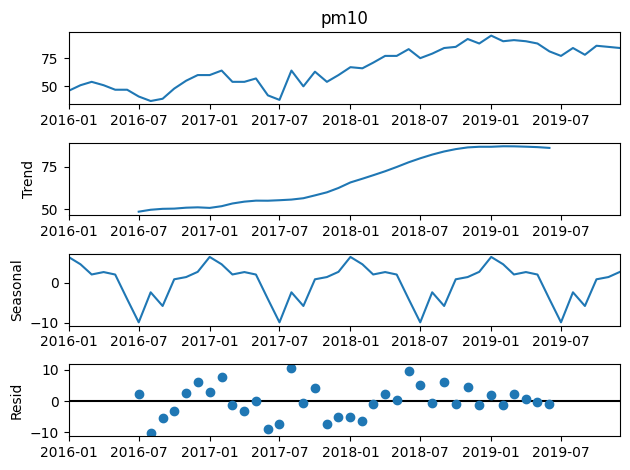

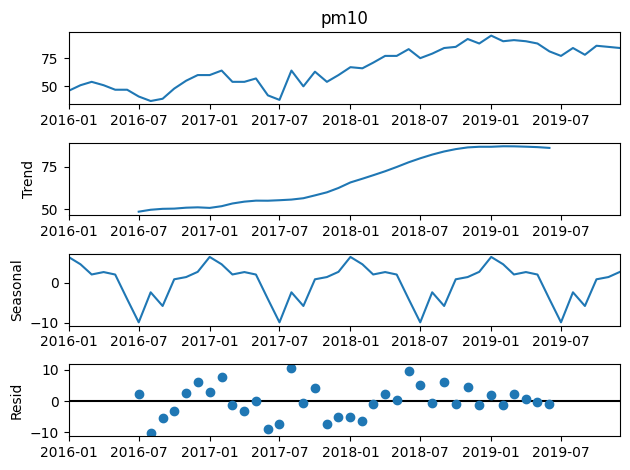

In [74]:
decompose_result = seasonal_decompose(train, period=12 ,model='add')
decompose_result.plot() # Plotting seasonality graphs for checking trend

In [75]:
trend=(decompose_result.trend.shift(-12)/decompose_result.trend).mean()

In [76]:
trend # The value of trend 

1.2890508187134773

#### During covid lockdown PM10 dropped by almost 45%, so this will create outlier in our data. So we will clean our data
#### PM10 during April and May 2020 were affected, as june, july are rainy season so PM10 conc in air decreases

In [77]:
april_pm10_mean=(df1["pm10"][3]+df1["pm10"][15]+df1["pm10"][27]+df1["pm10"][39])/4
april_pm10_mean*=trend
df1["pm10"][51]=april_pm10_mean
april_pm10_mean

87.65545567251645

In [78]:
may_pm10_mean=(df1["pm10"][4]+df1["pm10"][16]+df1["pm10"][28]+df1["pm10"][40])/4
may_pm10_mean*=trend
df1["pm10"][52]=may_pm10_mean
may_pm10_mean

86.68866755848134

In [79]:
df1["pm10"][64]=may_pm10_mean*trend                 #replacing missing value

In [80]:
train=df1['SO2'][:72]
test=df1['SO2'][72:]

In [60]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing    # Importing the Holt-Winters model for python

In [82]:
# Applying the Holt-Winters exponential smoothing for SO2 concentration
khammam_so2 = ExponentialSmoothing(
    train,
    seasonal_periods=12,
    trend="mul",
    seasonal="mul", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

prediction= khammam_so2.forecast(len(test))

for i in range(len(test)):
    print("Prediction:{}   Expected:{}".format(prediction[i], test[i]))
rmse= mse(test, prediction, squared=False)
print("RMSE: ",rmse)
mape1= mape(test, prediction)
print("MAPE: %.2f" %(mape1*100),"%")

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Prediction:7.380528999971275   Expected:6.8
Prediction:7.417740762352576   Expected:7.6
Prediction:7.458217765493109   Expected:7.8
Prediction:7.889805286596487   Expected:7.3
Prediction:7.5474621637612085   Expected:7.1
Prediction:7.491788919223916   Expected:7.4
Prediction:7.218514619508454   Expected:7.4
Prediction:6.859503042268678   Expected:7.4
Prediction:7.667303951087036   Expected:7.0
Prediction:7.207499291651062   Expected:7.4
Prediction:7.1409120946620925   Expected:8.0
Prediction:7.420491367199596   Expected:7.1
RMSE:  0.4736152667843773
MAPE: 5.67 %


In [83]:
train1=df1["pm10"][:72] # Splitting into train and testing
test1=df1["pm10"][72:]

In [93]:
# Training and testing Holt Winters Model on pm10 concentration data

khammam_pm10 = ExponentialSmoothing(
    train1,
    seasonal_periods=12,
    trend="add",
    seasonal="add", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

prediction1= khammam_pm10.forecast(len(test))
for i in range(len(test1)):
    print("Prediction:{}   Expected:{}".format(prediction1[i], test1[i]))
rmse= mse(test1, prediction1, squared=False)
print("RMSE: ",rmse)
mape1= mape(test1, prediction1)
print("MAPE: %.2f" %(mape1*100),"%")

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Prediction:84.53364356241472   Expected:80.0
Prediction:80.96256978279659   Expected:78.0
Prediction:76.91985992856803   Expected:76.0
Prediction:75.68149523948564   Expected:78.0
Prediction:84.15120940580023   Expected:77.0
Prediction:70.11329530452298   Expected:81.0
Prediction:62.50482082606819   Expected:73.0
Prediction:65.5843924448521   Expected:56.0
Prediction:66.68538177434004   Expected:41.0
Prediction:69.47499092780998   Expected:57.0
Prediction:79.44862748326442   Expected:78.0
Prediction:81.44436611215008   Expected:112.0
RMSE:  13.411224680654033
MAPE: 15.13 %


In [97]:
train2=df1["NOx"][:72]
test2=df1["NOx"][72:]

In [106]:
# Training and testing Holt Winters Model on Nox concentration data

khammam_nox = ExponentialSmoothing(
    train2,
    seasonal_periods=12,
    trend="add",
    seasonal="add", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

prediction2= khammam_nox.forecast(len(test))
for i in range(len(test1)):
    print("Prediction:{}   Expected:{}".format(prediction2[i], test2[i]))
rmse= mse(test2, prediction2, squared=False)
print("RMSE: ",rmse)
mape1= mape(test2, prediction2)
print("MAPE: %.2f" %(mape1*100),"%")

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Prediction:43.1071258992071   Expected:29.8
Prediction:43.28444547311409   Expected:30.7
Prediction:40.89459171745453   Expected:51.5
Prediction:35.28711940058339   Expected:44.6
Prediction:39.5439861472912   Expected:41.0
Prediction:37.46580510699423   Expected:45.4
Prediction:38.934250212236414   Expected:45.6
Prediction:34.0328151048963   Expected:41.5
Prediction:36.476484564692655   Expected:31.2
Prediction:36.49963873509032   Expected:30.9
Prediction:40.60044197749912   Expected:30.0
Prediction:39.847069986288346   Expected:29.1
RMSE:  9.069090911925732
MAPE: 24.00 %


In [95]:
khammam_so2_pred = ExponentialSmoothing(
    df1["SO2"],
    seasonal_periods=12,
    trend="mul",
    seasonal="mul", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

pred_2023_SO2= khammam_so2_pred.forecast(len(test))

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [109]:
khammam_nox_pred = ExponentialSmoothing(
    df1['NOx'],
    seasonal_periods=12,
    trend="add",
    seasonal="add", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

pred_2023_NOx= khammam_nox_pred.forecast(len(test))

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [110]:
khammam_pm10_pred = ExponentialSmoothing(
    df1['pm10'],
    seasonal_periods=12,
    trend="add",
    seasonal="add", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

pred_2023_PM10= khammam_pm10_pred.forecast(len(test))

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [111]:
pred= pd.DataFrame(data=pred_2023_SO2, columns=['SO2'])
pred['PM10']=pred_2023_PM10
pred['NOx']=pred_2023_NOx

In [112]:
pred # Predicted data frame

,SO2,PM10,NOx
2023-01-01,7.385371,104.521166,33.132014
2023-02-01,7.525385,100.959871,33.507835
2023-03-01,7.588904,96.987700,34.525234
2023-04-01,7.896994,95.987044,28.826545
2023-05-01,7.571474,102.878320,32.054080
2023-06-01,7.559551,91.188851,30.993182
2023-07-01,7.318389,83.305374,32.371936
2023-08-01,7.003509,83.294111,27.675609
2023-09-01,7.660047,81.874920,28.389458
2023-10-01,7.306148,86.326397,28.455986


In [113]:
## PM10 Sub-Index calculation
def PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

pred["PM10_SubIndex"] = pred["PM10"].apply(lambda x: PM10_subindex(x))

In [114]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    else:
        return 0

pred["NOx_SubIndex"] = pred['NOx'].apply(lambda x: get_NOx_subindex(x))

In [115]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    else:
        return 0

pred["SO2_SubIndex"] = pred["SO2"].apply(lambda x: get_SO2_subindex(x))

In [116]:
pred

,SO2,PM10,NOx,PM10_SubIndex,NOx_SubIndex,SO2_SubIndex
2023-01-01,7.385371,104.521166,33.132014,103.014111,41.415017,9.231714
2023-02-01,7.525385,100.959871,33.507835,100.639914,41.884794,9.406731
2023-03-01,7.588904,96.987700,34.525234,96.987700,43.156543,9.486130
2023-04-01,7.896994,95.987044,28.826545,95.987044,36.033181,9.871242
2023-05-01,7.571474,102.878320,32.054080,101.918880,40.067601,9.464342
2023-06-01,7.559551,91.188851,30.993182,91.188851,38.741478,9.449439
2023-07-01,7.318389,83.305374,32.371936,83.305374,40.464920,9.147986
2023-08-01,7.003509,83.294111,27.675609,83.294111,34.594512,8.754386
2023-09-01,7.660047,81.874920,28.389458,81.874920,35.486823,9.575059
2023-10-01,7.306148,86.326397,28.455986,86.326397,35.569983,9.132685


In [119]:
pred['AQI']=''

In [120]:
for i in range(len(pred)):
    pred["AQI"][i]= max(pred["SO2_SubIndex"][i],pred["PM10_SubIndex"][i],pred["NOx_SubIndex"][i])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19120\3451392264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred["AQI"][i]= max(pred["SO2_SubIndex"][i],pred["PM10_SubIndex"][i],pred["NOx_SubIndex"][i])


In [121]:
pred # final predicted data frame

,SO2,PM10,NOx,PM10_SubIndex,NOx_SubIndex,SO2_SubIndex,AQI
2023-01-01,7.385371,104.521166,33.132014,103.014111,41.415017,9.231714,103.014111
2023-02-01,7.525385,100.959871,33.507835,100.639914,41.884794,9.406731,100.639914
2023-03-01,7.588904,96.987700,34.525234,96.987700,43.156543,9.486130,96.9877
2023-04-01,7.896994,95.987044,28.826545,95.987044,36.033181,9.871242,95.987044
2023-05-01,7.571474,102.878320,32.054080,101.918880,40.067601,9.464342,101.91888
2023-06-01,7.559551,91.188851,30.993182,91.188851,38.741478,9.449439,91.188851
2023-07-01,7.318389,83.305374,32.371936,83.305374,40.464920,9.147986,83.305374
2023-08-01,7.003509,83.294111,27.675609,83.294111,34.594512,8.754386,83.294111
2023-09-01,7.660047,81.874920,28.389458,81.874920,35.486823,9.575059,81.87492
2023-10-01,7.306148,86.326397,28.455986,86.326397,35.569983,9.132685,86.326397


In [122]:
pred.to_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Prediction\\khammam_aqi_prediction.csv") # Writing to a csv file